In [ ]:
#Step 4- Mount Google Drive.
# -r command; means recursively

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import json

In [ ]:
# current directory
os.chdir('/content/gdrive/MyDrive/Kiwi')

In [ ]:
with open('system_results.json') as f:
    lines = f.readlines()

In [ ]:
print(lines)

['254.jpg\t[{"transcription": "PHOCAPITAL", "points": [[67, 51], [327, 46], [327, 74], [68, 80]]}, {"transcription": "107 State Street", "points": [[72, 92], [453, 84], [454, 114], [73, 122]]}, {"transcription": "Montpelier Vermont", "points": [[69, 135], [501, 125], [501, 156], [70, 165]]}, {"transcription": "802 225 6183", "points": [[71, 176], [364, 171], [364, 201], [72, 206]]}, {"transcription": "REG", "points": [[74, 302], [150, 299], [151, 333], [75, 336]]}, {"transcription": "07-24-2017 06:59 PM", "points": [[198, 300], [651, 285], [652, 315], [199, 330]]}, {"transcription": "045555", "points": [[510, 331], [651, 325], [653, 357], [511, 362]]}, {"transcription": "CT", "points": [[537, 370], [588, 370], [588, 402], [537, 402]]}, {"transcription": "T1", "points": [[397, 457], [442, 457], [442, 491], [397, 491]]}, {"transcription": "$7.95", "points": [[539, 452], [655, 447], [657, 480], [540, 485]]}, {"transcription": "1 F00D", "points": [[111, 470], [252, 464], [253, 496], [112, 

In [ ]:
# file format
# ['254.jpg\t[{"transcription": "PHOCAPITAL", "points": [[67, 51], [327, 46], [327, 74], [68, 80]]},

In [ ]:
#df = pd.DataFrame.from_dict(pd.json_normalize(lines), orient='columns')

In [ ]:
#pd.DataFrame.from_dict(lines, orient='columns')

In [ ]:
# import json
# fi = open('system_results.json','r')
# data = json.loads(fi.read())
# print(data)

In [ ]:
lines[0]

lines[0].split("\t")[0]

lines[0].split("\t")[1]

'[{"transcription": "PHOCAPITAL", "points": [[67, 51], [327, 46], [327, 74], [68, 80]]}, {"transcription": "107 State Street", "points": [[72, 92], [453, 84], [454, 114], [73, 122]]}, {"transcription": "Montpelier Vermont", "points": [[69, 135], [501, 125], [501, 156], [70, 165]]}, {"transcription": "802 225 6183", "points": [[71, 176], [364, 171], [364, 201], [72, 206]]}, {"transcription": "REG", "points": [[74, 302], [150, 299], [151, 333], [75, 336]]}, {"transcription": "07-24-2017 06:59 PM", "points": [[198, 300], [651, 285], [652, 315], [199, 330]]}, {"transcription": "045555", "points": [[510, 331], [651, 325], [653, 357], [511, 362]]}, {"transcription": "CT", "points": [[537, 370], [588, 370], [588, 402], [537, 402]]}, {"transcription": "T1", "points": [[397, 457], [442, 457], [442, 491], [397, 491]]}, {"transcription": "$7.95", "points": [[539, 452], [655, 447], [657, 480], [540, 485]]}, {"transcription": "1 F00D", "points": [[111, 470], [252, 464], [253, 496], [112, 502]]}, {"

In [ ]:
def preprocess(file):
  image_name = []
  transcription = []
  #points = []
  xmin_ymin = []
  xmax_ymin = []
  xmax_ymax = []
  xmin_ymax = []
  for line in file:
    name = line.split("\t")[0]
    info = json.loads(line.split("\t")[1])
    for i in info:
      image_name.append(name)
      transcription.append(i['transcription'])
      xmin_ymin.append(i['points'][0])
      xmax_ymin.append(i['points'][1])
      xmax_ymax.append(i['points'][2])
      xmin_ymax.append(i['points'][3])

  paired = pd.DataFrame(list(zip(image_name, transcription, xmin_ymin, xmax_ymin, xmax_ymax, xmin_ymax)), \
                        columns=['image_name', 'transcription', 'xmin_ymin', 'xmax_ymin', 'xmax_ymax', 'xmin_ymax'])

  #df = pd.DataFrame.from_dict(json.loads(info[0]), orient='columns')


  return paired

In [ ]:
preprocessed_df = preprocess(lines)

In [ ]:
preprocessed_df

,image_name,transcription,xmin_ymin,xmax_ymin,xmax_ymax,xmin_ymax
0,254.jpg,PHOCAPITAL,"[67, 51]","[327, 46]","[327, 74]","[68, 80]"
1,254.jpg,107 State Street,"[72, 92]","[453, 84]","[454, 114]","[73, 122]"
2,254.jpg,Montpelier Vermont,"[69, 135]","[501, 125]","[501, 156]","[70, 165]"
3,254.jpg,802 225 6183,"[71, 176]","[364, 171]","[364, 201]","[72, 206]"
4,254.jpg,REG,"[74, 302]","[150, 299]","[151, 333]","[75, 336]"
...,...,...,...,...,...,...
154,wandb_models.png,0.05296,"[1120, 421]","[1182, 421]","[1182, 444]","[1120, 444]"
155,wandb_models.png,model-1cnc4c94,"[77, 450]","[215, 450]","[215, 471]","[77, 471]"
156,wandb_models.png,model-12q79ele,"[77, 482]","[215, 482]","[215, 502]","[77, 502]"
157,wandb_models.png,model-1p0obqf6,"[77, 513]","[215, 513]","[215, 534]","[77, 534]"


Calculate the distance
Method 1
1. find the centroid from coordinates for each box (for the same image ones)
2. Calculate the distances from each centroid/ find the minimum, store the closest transcription(box) info in another column?
3. find the closest boxes (smallest distance) -> identify as the closest boxes
4. K-means clustering to identify closest clustering

Method 2
1. for each pair of two boxes (for the same image ones), calculate `(abs(xmax_2 - xmax_1), abs(ymax_2 - ymax_1))`
2. Multiply (or add) these results (e.g. 50*60) and pair with transcription: (transcription, distance)
3. find the minimum distance ones (e.g. sort by distance, find the minimum (first in the list)
4. sotre the closest box as another column

In [ ]:
# calculate the distance; min(polygons <> points & polygons <> polygons)


# def closest(k1,k2,true_dist):
#   return _closest(k1,0,k2,0,true_dist,float("inf"))

# def _closest(k1,i1,k2,i2,true_dist,lim):
#   b1=k1.bbox[i1]
#   b2=k2.bbox[i2]
#   # Call leaves their own single children:
#   cc1=k1.child[i1] or (i1,)
#   cc2=k2.child[i2] or (i2,)
#   if len(cc1)==1 and len(cc2)==1:
#     return min(lim,true_dist(i1,i2))
#   # Consider 2 or 4 pairs of children, possibly-closest first:
#   for md,c1,c2 in sorted((min_dist(k1.bbox[c1],k2.bbox[c2]),c1,c2)
#                          for c1 in cc1 for c2 in cc2):
#     if md>=lim: break
#     lim=min(lim,_closest(k1,c1,k2,c2,true_dist,lim)
#   return lim

In [ ]:
preprocessed_df.loc[:0][["xmin_ymin",	"xmax_ymin",	"xmax_ymax",	"xmin_ymax"]]

,xmin_ymin,xmax_ymin,xmax_ymax,xmin_ymax
0,"[67, 51]","[327, 46]","[327, 74]","[68, 80]"


In [ ]:
def convert(list):
    return tuple(list)


In [ ]:
for col in preprocessed_df.columns:
  if col in ["xmin_ymin",	"xmax_ymin",	"xmax_ymax",	"xmin_ymax"]:
    preprocessed_df[col] = preprocessed_df[col].apply(convert)


In [ ]:
from shapely import wkt, Polygon, centroid
pol = preprocessed_df.loc[0][["xmin_ymin",	"xmax_ymin",	"xmax_ymax",	"xmin_ymax"]].tolist()
#p1 = wkt.loads("Polygon(preprocessed_df.loc[0][["xmin_ymin",	"xmax_ymin",	"xmax_ymax",	"xmin_ymax"]].tolist())")
p2 = centroid(Polygon(pol))
#print(p1.centroid.wkt)
print(p2)

POINT (196.4752765200153 62.75742830753981)


In [ ]:
#this solution outputs Points() type which is an issue
# from shapely import wkt, Polygon, centroid

# def calculate_centroid(row):
#   p1 = row["xmin_ymin"]
#   p2 = row["xmax_ymin"]
#   p3 = row["xmax_ymax"]
#   p4 = row["xmin_ymax"]

#   pol = [p1, p2, p3, p4]
#   cent = centroid(Polygon(pol))
#   return cent


In [ ]:
#preprocessed_df['centorid'] = preprocessed_df.apply(lambda x: calculate_centroid(x), axis=1)

In [ ]:
import numpy as np
#tuple(np.mean(preprocessed_df.loc[0][["xmin_ymin",	"xmax_ymin",	"xmax_ymax",	"xmin_ymax"]].tolist(), axis=0))

def calculate_centroid(row):
  p1 = row["xmin_ymin"]
  p2 = row["xmax_ymin"]
  p3 = row["xmax_ymax"]
  p4 = row["xmin_ymax"]

  pol = [p1, p2, p3, p4]
  cent = tuple(np.mean(pol, axis=0))
  return cent

In [ ]:
preprocessed_df['centeroid'] = preprocessed_df.apply(lambda x: calculate_centroid(x), axis=1)

In [ ]:
preprocessed_df['centeroid']

0       (197.25, 62.75)
1        (263.0, 103.0)
2      (285.25, 145.25)
3       (217.75, 188.5)
4        (112.5, 317.5)
             ...       
154     (1151.0, 432.5)
155      (146.0, 460.5)
156      (146.0, 492.0)
157      (146.0, 523.5)
158      (144.0, 554.0)
Name: centeroid, Length: 159, dtype: object

In [ ]:
# verifying that np.mean is getting mean of x and y
# x_co = []
# y_co = []
# for x, y in preprocessed_df.loc[0][["xmin_ymin",	"xmax_ymin",	"xmax_ymax",	"xmin_ymax"]].tolist():
#   x_co.append(x)
#   y_co.append(y)


In [ ]:
#np.mean(x_co)

In [ ]:
from scipy.spatial import distance

# two points
a = (2, 3, 6)
b = (5, 7, 1)
# distance b/w a and b
d = distance.euclidean(preprocessed_df.loc[2]['centeroid'], preprocessed_df.loc[3]['centeroid'])
# display the result
print(d)

80.16740297652157


In [ ]:
gped = pd.DataFrame(preprocessed_df.groupby("image_name")['centeroid'].apply(list).reset_index(name='new'))

In [ ]:
len(gped.new.loc[0])

28

In [ ]:
gped

,image_name,new
0,254.jpg,"[(197.25, 62.75), (263.0, 103.0), (285.25, 145..."
1,fridge_image_2023-07-18 12:15:10.363694_.jpg,"[(417.5, 16.0), (406.5, 117.25), (402.5, 241.5..."
2,img623.jpg,"[(191.5, 189.25), (452.0, 238.0), (210.0, 356...."
3,img_10.jpg,"[(136.75, 34.5), (121.5, 65.0), (121.25, 93.25)]"
4,img_11.jpg,"[(447.5, 64.75), (447.25, 83.25), (449.5, 102.5)]"
5,img_12.jpg,"[(803.25, 198.25), (803.25, 365.25), (803.25, ..."
6,img_195.jpg,"[(306.0, 194.5), (113.25, 257.5), (320.0, 279...."
7,model_prod_flow_en.png,"[(817.0, 29.5), (425.75, 87.5), (120.5, 108.0)..."
8,wandb_metrics.png,"[(60.0, 22.5), (1765.0, 22.5), (323.5, 81.5), ..."
9,wandb_models.png,"[(20.75, 20.75), (421.0, 20.5), (497.5, 20.0),..."


In [ ]:
# dis = []
# for (i, j), (k, l) in gped.new.loc[0]:
#   #print(i, j)
#   dis.append(distance.euclidean((i, j), (k, l)))

In [ ]:
28*27/2

378.0

In [ ]:

from scipy.spatial import distance
from itertools import combinations

dis = []
combi = list(combinations(gped.new.loc[0], 2))
for i, j in combi:
  dis.append(distance.euclidean(i, j))

In [ ]:
min(dis)

40.2624204438829

In [ ]:
#print(preprocessed_df.image_name.unique())
preprocessed_df[preprocessed_df.image_name == "fridge_image_2023-07-18 12:15:10.363694_.jpg"].centeroid

28        (417.5, 16.0)
29      (406.5, 117.25)
30       (402.5, 241.5)
31     (405.75, 305.75)
32      (403.5, 369.75)
33      (1431.0, 431.0)
34      (1423.5, 459.0)
35       (400.0, 639.5)
36       (396.5, 705.5)
37       (223.5, 738.0)
38       (407.5, 775.0)
39     (404.25, 812.75)
40       (302.5, 868.5)
41       (485.0, 866.0)
42       (597.5, 887.5)
43       (402.5, 932.0)
44    (1340.0, 1031.25)
Name: centeroid, dtype: object

In [ ]:
fridge_centroid = gped[gped['image_name']=="fridge_image_2023-07-18 12:15:10.363694_.jpg"].new

In [ ]:
# the above comes out as nested lists so removing one off
from itertools import chain

fridge_centroid_unchained = list(chain(*fridge_centroid))

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

KMeans(n_clusters=8, random_state=0, n_init="auto").fit_predict(fridge_centroid_unchained)
# kmeans.labels_
# kmeans.predict([[0, 0], [12, 3]])
# kmeans.cluster_centers_

array([2, 2, 5, 5, 5, 1, 1, 7, 7, 0, 4, 4, 0, 4, 6, 4, 3], dtype=int32)

In [ ]:
gped[gped['image_name']=="fridge_image_2023-07-18 12:15:10.363694_.jpg"]

,image_name,new
1,fridge_image_2023-07-18 12:15:10.363694_.jpg,"[(417.5, 16.0), (406.5, 117.25), (402.5, 241.5..."


In [ ]:
preprocessed_df[preprocessed_df['image_name']=="fridge_image_2023-07-18 12:15:10.363694_.jpg"]

,image_name,transcription,xmin_ymin,xmax_ymin,xmax_ymax,xmin_ymax,centeroid
28,fridge_image_2023-07-18 12:15:10.363694_.jpg,NADERJOE'S,"(272, 0)","(563, 0)","(563, 32)","(272, 32)","(417.5, 16.0)"
29,fridge_image_2023-07-18 12:15:10.363694_.jpg,RICE,"(238, 50)","(580, 63)","(575, 184)","(233, 172)","(406.5, 117.25)"
30,fridge_image_2023-07-18 12:15:10.363694_.jpg,DRINK,"(237, 201)","(571, 212)","(568, 282)","(234, 271)","(402.5, 241.5)"
31,fridge_image_2023-07-18 12:15:10.363694_.jpg,NON-DAIRY BEVERAGE,"(245, 288)","(567, 297)","(566, 323)","(245, 315)","(405.75, 305.75)"
32,fridge_image_2023-07-18 12:15:10.363694_.jpg,ORGANIC,"(244, 341)","(564, 347)","(563, 398)","(243, 393)","(403.5, 369.75)"
33,fridge_image_2023-07-18 12:15:10.363694_.jpg,MILD SALSA,"(1372, 416)","(1490, 416)","(1490, 446)","(1372, 446)","(1431.0, 431.0)"
34,fridge_image_2023-07-18 12:15:10.363694_.jpg,AADE WITH AGAVEN,"(1362, 450)","(1485, 450)","(1485, 468)","(1362, 468)","(1423.5, 459.0)"
35,fridge_image_2023-07-18 12:15:10.363694_.jpg,Unsweetened,"(325, 628)","(475, 628)","(475, 651)","(325, 651)","(400.0, 639.5)"
36,fridge_image_2023-07-18 12:15:10.363694_.jpg,ORIGINAL,"(258, 683)","(535, 683)","(535, 728)","(258, 728)","(396.5, 705.5)"
37,fridge_image_2023-07-18 12:15:10.363694_.jpg,USDA,"(205, 731)","(242, 731)","(242, 745)","(205, 745)","(223.5, 738.0)"


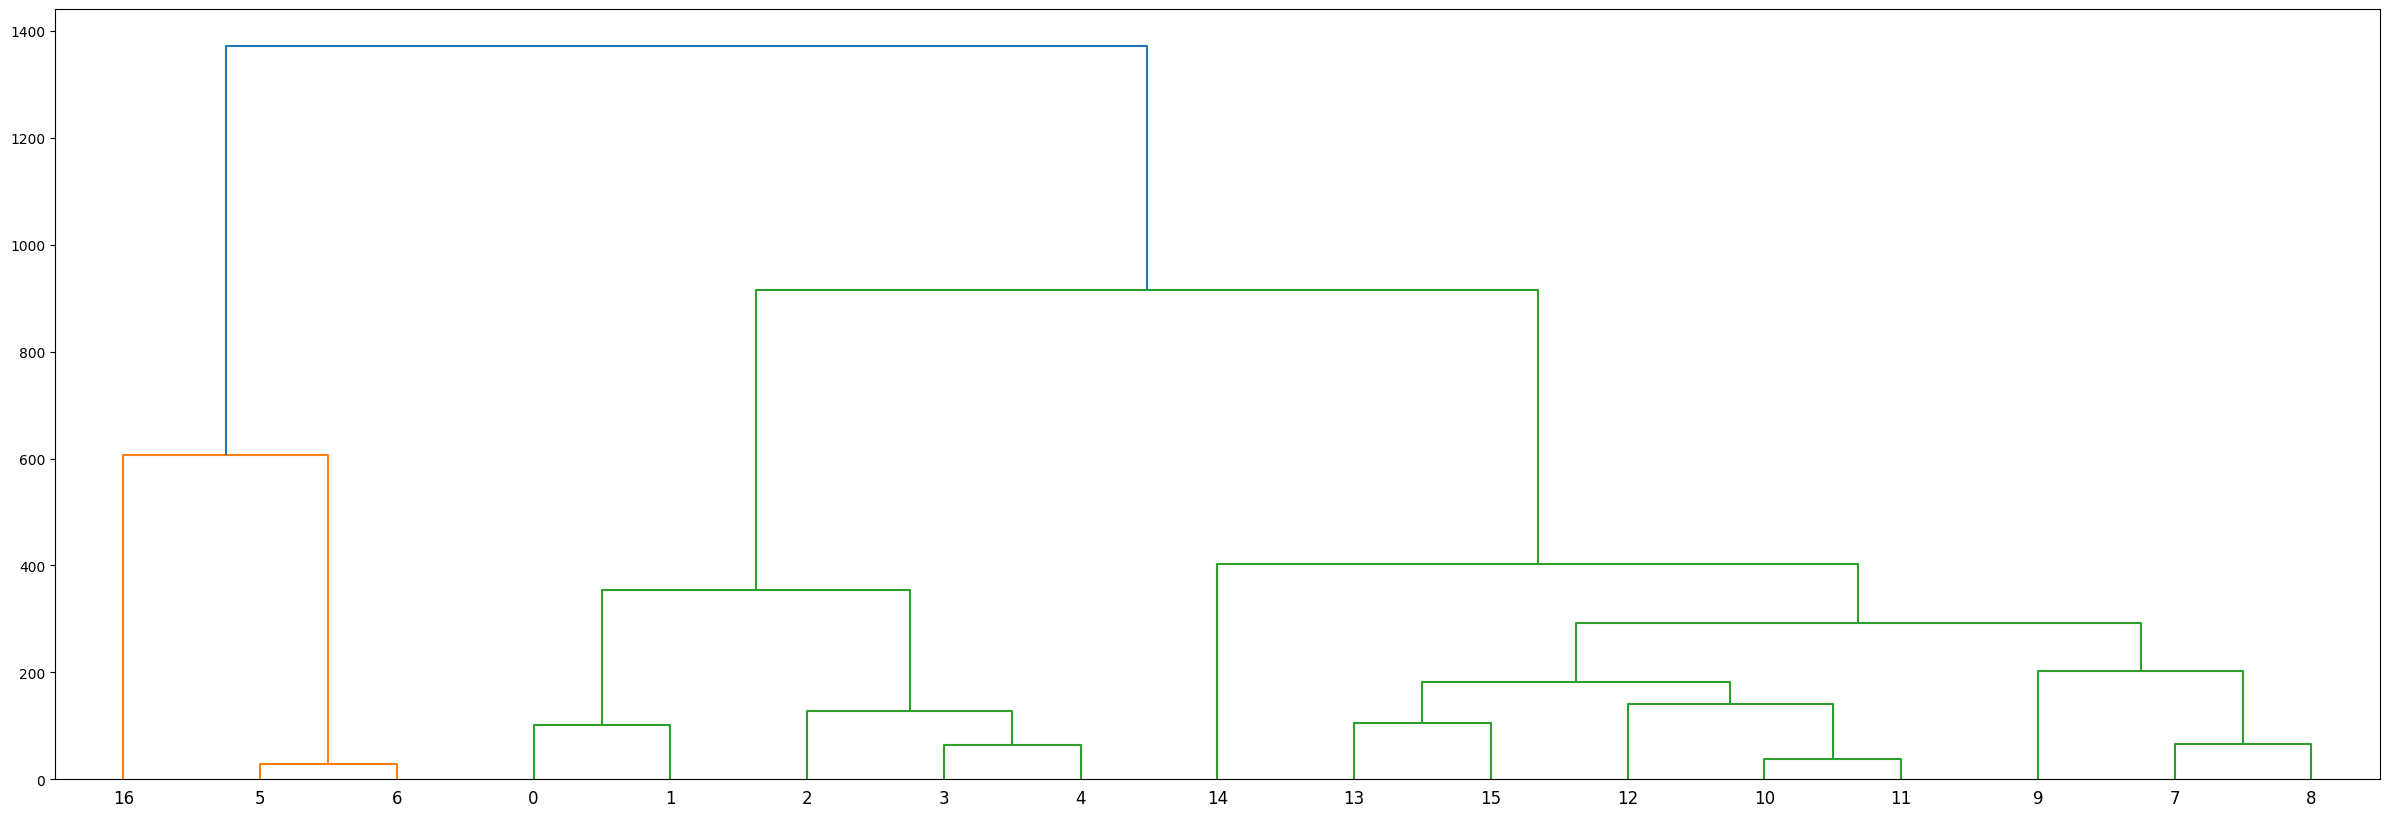

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
#X = locations_in_RI[['Latitude', 'Longitude']].values
Z = linkage(fridge_centroid_unchained,
            method='complete',  # dissimilarity metric: max distance across all pairs of
                                # records between two clusters
            metric='euclidean'
    )                           # you can peek into the Z matrix to see how clusters are
                                # merged at each iteration of the algorithm

# calculate full dendrogram and visualize it
plt.figure(figsize=(30, 10))
dendrogram(Z)
plt.show()

# retrive clusters with `max_d`
from scipy.cluster.hierarchy import fcluster
max_d = 25       # I assume that your `Latitude` and `Longitude` columns are both in
                 # units of miles
clusters = fcluster(Z, max_d, criterion='distance')

In [ ]:
clusters

array([ 4,  5,  8,  6,  7,  1,  2, 14, 15, 16, 11, 12, 13,  9, 17, 10,  3],
      dtype=int32)

In [ ]:
fridge_image = preprocessed_df[preprocessed_df['image_name']=="fridge_image_2023-07-18 12:15:10.363694_.jpg"]

In [ ]:
fridge_image['cluster']= clusters

<ipython-input-45-fb81d0fc0d93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fridge_image['cluster']= clusters


In [ ]:
fridge_image

,image_name,transcription,xmin_ymin,xmax_ymin,xmax_ymax,xmin_ymax,centeroid,cluster
28,fridge_image_2023-07-18 12:15:10.363694_.jpg,NADERJOE'S,"(272, 0)","(563, 0)","(563, 32)","(272, 32)","(417.5, 16.0)",4
29,fridge_image_2023-07-18 12:15:10.363694_.jpg,RICE,"(238, 50)","(580, 63)","(575, 184)","(233, 172)","(406.5, 117.25)",5
30,fridge_image_2023-07-18 12:15:10.363694_.jpg,DRINK,"(237, 201)","(571, 212)","(568, 282)","(234, 271)","(402.5, 241.5)",8
31,fridge_image_2023-07-18 12:15:10.363694_.jpg,NON-DAIRY BEVERAGE,"(245, 288)","(567, 297)","(566, 323)","(245, 315)","(405.75, 305.75)",6
32,fridge_image_2023-07-18 12:15:10.363694_.jpg,ORGANIC,"(244, 341)","(564, 347)","(563, 398)","(243, 393)","(403.5, 369.75)",7
33,fridge_image_2023-07-18 12:15:10.363694_.jpg,MILD SALSA,"(1372, 416)","(1490, 416)","(1490, 446)","(1372, 446)","(1431.0, 431.0)",1
34,fridge_image_2023-07-18 12:15:10.363694_.jpg,AADE WITH AGAVEN,"(1362, 450)","(1485, 450)","(1485, 468)","(1362, 468)","(1423.5, 459.0)",2
35,fridge_image_2023-07-18 12:15:10.363694_.jpg,Unsweetened,"(325, 628)","(475, 628)","(475, 651)","(325, 651)","(400.0, 639.5)",14
36,fridge_image_2023-07-18 12:15:10.363694_.jpg,ORIGINAL,"(258, 683)","(535, 683)","(535, 728)","(258, 728)","(396.5, 705.5)",15
37,fridge_image_2023-07-18 12:15:10.363694_.jpg,USDA,"(205, 731)","(242, 731)","(242, 745)","(205, 745)","(223.5, 738.0)",16


In [ ]:
fridge_image.sort_values('cluster')[['transcription']]

,transcription
33,MILD SALSA
34,AADE WITH AGAVEN
44,Ashley's Green Life
28,NADERJOE'S
29,RICE
31,NON-DAIRY BEVERAGE
32,ORGANIC
30,DRINK
41,Gluten Free
43,NET 64 FL OZ(1/2 GAL)1.89 L


In [ ]:
# change the order of outputs? Top to Bottom, Left to Right

# make it one array/list

# i, j for list: (every pair 2-3 words) -> filter the list of food items?

In [ ]:
# webscraping the inventories of multiple supermarkets

# match with the text ->

In [ ]:
# sort by xmin_ymin

# and make one signle array

In [ ]:
fridge_image.sort_values('xmin_ymin', ascending=False)[['xmin_ymin','transcription']]

,xmin_ymin,transcription
33,"(1372, 416)",MILD SALSA
34,"(1362, 450)",AADE WITH AGAVEN
44,"(1111, 1015)",Ashley's Green Life
42,"(563, 876)",PAREVE
41,"(408, 851)",Gluten Free
38,"(347, 760)",Enriched
35,"(325, 628)",Unsweetened
28,"(272, 0)",NADERJOE'S
36,"(258, 683)",ORIGINAL
40,"(252, 854)",gV


In [ ]:
def sort_by_xmin(df):
  sorted = df.sort_values('xmin_ymin', ascending=False)[['xmin_ymin','transcription']]
  transcription_list = sorted.transcription.tolist()
  return transcription_list

In [ ]:
sorted = fridge_image.sort_values('xmin_ymin', ascending=False)[['xmin_ymin','transcription']]

In [ ]:
result = sort_by_xmin(fridge_image)

In [ ]:
fridge_image.sort_values('centeroid', ascending=False)[['transcription']]

,transcription
33,MILD SALSA
34,AADE WITH AGAVEN
44,Ashley's Green Life
42,PAREVE
41,Gluten Free
28,NADERJOE'S
38,Enriched
29,RICE
31,NON-DAIRY BEVERAGE
39,"Vitamins A,D,B& Calcium"


In [ ]:
txt = "Organicville Organic Mild Salsa With Agave Nectar, 12 oz - Mariano's"

In [ ]:
seq = pd.Series(result)
window_size = 3

result_seq = []
for i in range(len(seq) - window_size + 1):
    window_ = seq[i: i + window_size].tolist()
    result_seq.append(' '.join(window_))

In [ ]:
seq

0                      MILD SALSA
1                AADE WITH AGAVEN
2             Ashley's Green Life
3                          PAREVE
4                     Gluten Free
5                        Enriched
6                     Unsweetened
7                      NADERJOE'S
8                        ORIGINAL
9                              gV
10    NET 64 FL OZ(1/2 GAL)1.89 L
11             NON-DAIRY BEVERAGE
12                        ORGANIC
13                           RICE
14                          DRINK
15        Vitamins A,D,B& Calcium
16                           USDA
dtype: object

In [ ]:
pd.Series(txt.split(" "))

0     Organicville
1          Organic
2             Mild
3            Salsa
4             With
5            Agave
6          Nectar,
7               12
8               oz
9                -
10       Mariano's
dtype: object

In [ ]:

seq2 = pd.Series(txt.split(" "))
window_size = 3

txt_seq = []
for i in range(len(seq2) - window_size + 1):
  window_ = seq2[i: i + window_size].tolist()
  txt_seq.append(' '.join(window_))

In [ ]:
txt_seq

['Organicville Organic Mild',
 'Organic Mild Salsa',
 'Mild Salsa With',
 'Salsa With Agave',
 'With Agave Nectar,',
 'Agave Nectar, 12',
 'Nectar, 12 oz',
 '12 oz -',
 "oz - Mariano's"]

In [ ]:
result_seq

["MILD SALSA AADE WITH AGAVEN Ashley's Green Life",
 "AADE WITH AGAVEN Ashley's Green Life PAREVE",
 "Ashley's Green Life PAREVE Gluten Free",
 'PAREVE Gluten Free Enriched',
 'Gluten Free Enriched Unsweetened',
 "Enriched Unsweetened NADERJOE'S",
 "Unsweetened NADERJOE'S ORIGINAL",
 "NADERJOE'S ORIGINAL gV",
 'ORIGINAL gV NET 64 FL OZ(1/2 GAL)1.89 L',
 'gV NET 64 FL OZ(1/2 GAL)1.89 L NON-DAIRY BEVERAGE',
 'NET 64 FL OZ(1/2 GAL)1.89 L NON-DAIRY BEVERAGE ORGANIC',
 'NON-DAIRY BEVERAGE ORGANIC RICE',
 'ORGANIC RICE DRINK',
 'RICE DRINK Vitamins A,D,B& Calcium',
 'DRINK Vitamins A,D,B& Calcium USDA']

In [ ]:
txt_seq_list = txt.split(" ")
window_size = 1

txt_window = []
for i in range(len(txt_seq_list) - window_size +1):
  txt_window.append(" ".join(txt_seq_list[i:i+window_size]))

In [ ]:
txt_window

['Organicville',
 'Organic',
 'Mild',
 'Salsa',
 'With',
 'Agave',
 'Nectar,',
 '12',
 'oz',
 '-',
 "Mariano's"]

In [1]:
# import re

# result_list = []

# for word in result_seq:
#   for word2 in txt_window:
#     #x = re.search(word2.lower(), word.lower())
#     x = word2.lower().search(word.lower())
#     if x:
#       #result_list.append(x.group(0))
#       result_list.append(x.group(1))

# print(result_list)